## Base-MLP

A baseline Multi-Layered Perceptron with 1 hidden layer of100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters.

We start by importing the libraries.

In [9]:
%load_ext autoreload
%autoreload 2

from utils import config
from utils import ProcessDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Latin and Greek train data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.

In [10]:
Latin_Train = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TRAIN_SET))
Latin_X_Train = Latin_Train[:,0:1024]
Latin_Y_Train = Latin_Train[:,1024]

Greek_Train = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TRAIN_SET))
Greek_X_Train = Greek_Train[:,0:1024]
Greek_Y_Train = Greek_Train[:,1024]

### Training the perceptron model

In [23]:
clf_latin = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')
clf_greek.fit(Greek_X_Train, Greek_Y_Train)

/home/niyon/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/niyon/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', solver='sgd')

## Predicting new values

First we load the test dataset and then use the model to predict what character they are.

In [24]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

In [25]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/BASE-MLP-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/BASE-MLP-DS2.csv", header=None)

## Finding out how accurate our model is

### 1. Confusion Matrix

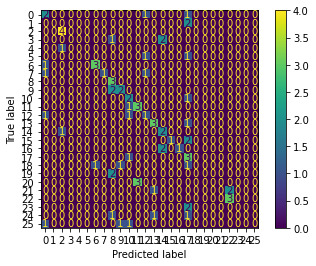

In [26]:
plot_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test)
plt.show()

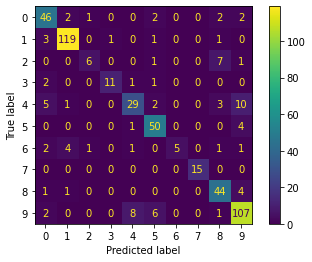

In [27]:
plot_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test)
plt.show()

### 2. Precision, recall, and f1-measure for each class

In [28]:
ProcessDataset.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

/home/niyon/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1
0,0.333333,0.500000,0.400000
1,0.000000,0.000000,0.000000
2,0.666667,1.000000,0.800000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.750000,0.750000,0.750000
7,1.000000,0.333333,0.500000
8,0.333333,1.000000,0.500000
9,0.500000,0.500000,0.500000


In [29]:
ProcessDataset.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.754098,0.836364,0.793103
1,0.937008,0.952000,0.944444
2,0.750000,0.400000,0.521739
3,0.916667,0.733333,0.814815
4,0.725000,0.580000,0.644444
5,0.793651,0.909091,0.847458
6,1.000000,0.333333,0.500000
7,1.000000,1.000000,1.000000
8,0.745763,0.880000,0.807339
9,0.829457,0.862903,0.845850


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Perceptron model on DS1

In [30]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 43.037974683544306%
Macro-average f1 of perceptron model on DS1: 30.60407428828481%
Weighted-average f1 of perceptron model on DS1: 35.32105580406713%


#### Perceptron model on DS2

In [31]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 83.23699421965318%
Macro-average f1 of perceptron model on DS1: 77.19193161445817%
Weighted-average f1 of perceptron model on DS1: 82.52587554419169%
